In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
2.2.2
3.10.0
0.13.2
1.6.1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Load the data
games = pandas.read_csv("games.csv")

In [4]:
# Print the names of the columns in games
print(games.columns)

print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


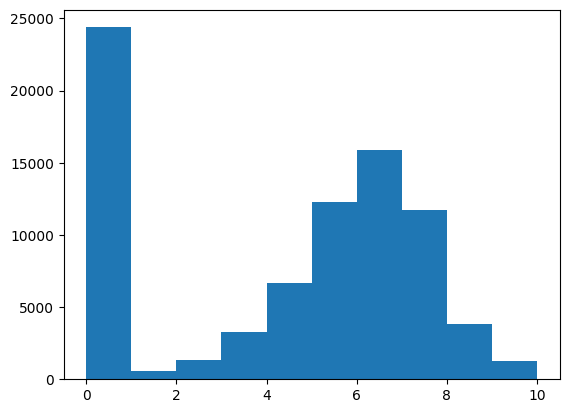

In [5]:
# Make a histogram of all the ratings in the average_rating column
plt.hist(games["average_rating"])
plt.show()

In [6]:
# Print the first row of all the games with zero scores
print(games[games["average_rating"] ==0].iloc[0])

# Print the first row of games with scores greater than 0
print(games[games["average_rating"] >0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

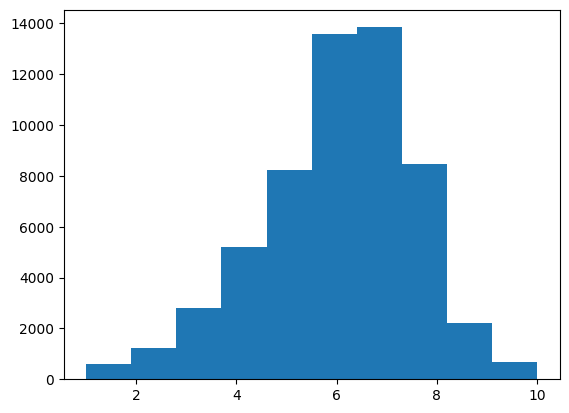

In [7]:
# Remove any rows without user reviews
games = games[games["users_rated"] >0]

# Remove any rows with missing values
games = games.dropna(axis=0)

# Make another histogram of all the average ratings
plt.hist(games["average_rating"])
plt.show()

In [8]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


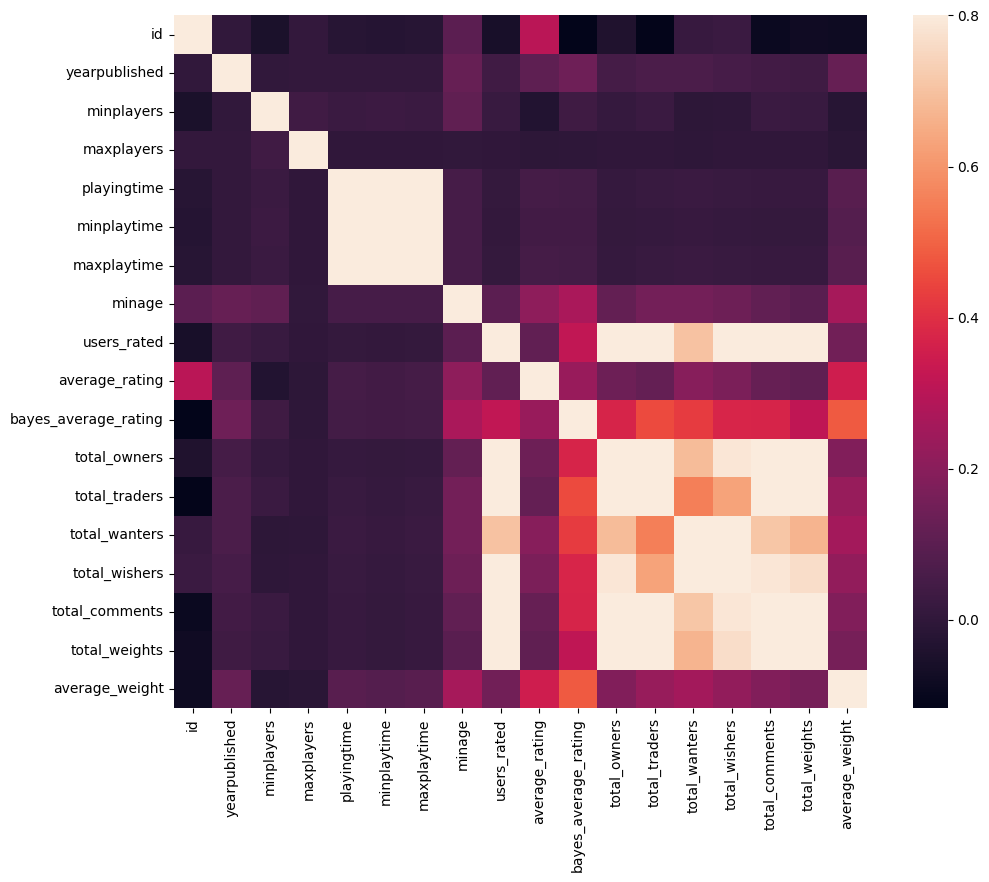

In [9]:
# Correlation matrix (Had to add numeric_only)

corrmat = games.corr(numeric_only=True)
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
# Get all the columns from the dataFrame
columns = games.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting on
target = "average_rating"

In [11]:
# Generate training and test datasets
from sklearn.model_selection import train_test_split

# Generate training set
train = games.sample(frac=0.8, random_state = 1)

# Select anything not in the training set and put it in the test set
test = games.loc[~games.index.isin(train.index)]

# Print shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [12]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initilise the model class
LR = LinearRegression()

# Fit the model to the training data
LR.fit(train[columns], train[target])

LinearRegression()

In [13]:
# Generate predictions for the test set
predictions = LR.predict(test[columns])

# Compute error between test predictions and actual values
mean_squared_error(predictions, test[target])

2.078819032629323

In [14]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initilise the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state = 1)

# Fit to the data
RFR.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [15]:
# Make predictions
predictions = RFR.predict(test[columns])

# compute the error between our test predictions and actual values
mean_squared_error(predictions, test[target])

1.4458625791207198

In [16]:
test[columns].iloc[0]

,9
yearpublished,2011.0000
minplayers,2.0000
maxplayers,6.0000
playingtime,200.0000
minplaytime,60.0000
maxplaytime,200.0000
minage,14.0000
users_rated,15709.0000
total_owners,17611.0000
total_traders,273.0000


In [17]:
# Make predicions with both models
rating_LR = LR.predict(test[columns].iloc[[0]])
rating_RFR = RFR.predict(test[columns].iloc[[0]])

# Print out the predictions
print("Linear Regression",rating_LR)
print("Random Forest Regressor",rating_RFR)

Linear Regression [8.12061283]
Random Forest Regressor [7.91373581]


In [18]:
# Actual rating
test[target].iloc[0]

np.float64(8.07933)